## Homework 4

Data preparation: 
Check if the missing values are presented in the features.
If there are missing values:
For caterogiral features, replace them with 'NA'
For numerical features, replace with with 0.0
Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('C:/Users/Sasha/Downloads/course_lead_scoring.csv')

In [3]:
len(df)

1462

In [4]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [5]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [6]:
#find the categorical features
categorical_features = list(df.dtypes[df.dtypes == 'object'].index)
categorical_features

['lead_source', 'industry', 'employment_status', 'location']

In [7]:
for col in categorical_features:
    df[col] = df[col].fillna('NA')

In [8]:
#find the numerical features
numerical_features = list(df.select_dtypes(include=[np.number]))
numerical_features

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'converted']

In [9]:
for col in numerical_features:
    df[col] = df[col].fillna(0.0)

In [10]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [11]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [12]:
y_train = df_train.converted.values
y_test = df_test.converted.values
y_val = df_val.converted.values

In [13]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

## Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['balance'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [15]:
numerical_features2 = list(df_train.select_dtypes(include=[np.number]))
numerical_features2 

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [16]:
for col in numerical_features2:
    print('%6s' %col, roc_auc_score(y_train,df_train[col]))

number_of_courses_viewed 0.7635680590007088
annual_income 0.5519578313253012
interaction_count 0.738270176293409
lead_score 0.6144993577250176


Answer: number_of_courses_viewed 

## Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
What's the AUC of this model on the validation dataset? (round to 3 digits)

In [17]:
train_dict = df_train[categorical_features + numerical_features2].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [18]:
X_train

array([[9.5543e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [5.4924e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [7.7352e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       ...,
       [7.3702e+04, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.3341e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [19]:
val_dict = df_val[categorical_features + numerical_features2].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [20]:
X_val

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.8777e+04, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        2.0000e+00],
       [7.8148e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       ...,
       [9.2215e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+00],
       [5.3087e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [6.0375e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00]])

In [21]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [22]:
y_pred = model.predict_proba(X_val)[:, 1]

In [23]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

In [24]:
roc_auc_score(y_val, y_pred)

np.float64(0.8171316268814112)

In [25]:
auc(fpr, tpr)

np.float64(0.8171316268814112)

## Question 3: Precision and Recall
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them
At which threshold precision and recall curves intersect?

In [26]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds: 
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    precision = tp / (tp + fp) if (tp + fp)>0 else 0
    recall = tp / (tp + fn)
    scores.append((t, tp, fp, fn, tn, precision, recall))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'precision', 'recall']

In [27]:
df_scores.head()

,threshold,tp,fp,fn,tn,precision,recall
0,0.00,171,122,0,0,0.583618,1.0
1,0.01,171,122,0,0,0.583618,1.0
2,0.02,171,122,0,0,0.583618,1.0
3,0.03,171,122,0,0,0.583618,1.0
4,0.04,171,122,0,0,0.583618,1.0


In [28]:
df_scores['Diff'] = abs(df_scores['precision'] - df_scores['recall'])

In [29]:
df_scores.sort_values(by='Diff').head()

,threshold,tp,fp,fn,tn,precision,recall,Diff
100,1.00,0,0,171,122,0.000000,0.000000,0.000000
99,0.99,0,0,171,122,0.000000,0.000000,0.000000
98,0.98,0,0,171,122,0.000000,0.000000,0.000000
64,0.64,134,38,37,84,0.779070,0.783626,0.004556
65,0.65,130,37,41,85,0.778443,0.760234,0.018209


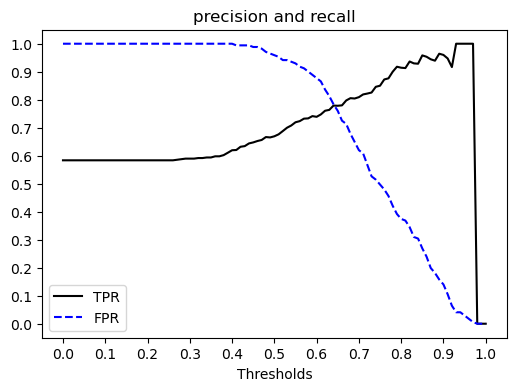

In [30]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.precision, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.recall, color='blue', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('precision and recall')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

## Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1=2*(P*R)/(P+R)

Where 
P
 is precision and 
R
 is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

In [31]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds: 
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    p = tp / (tp + fp) if (tp + fp)>0 else 0
    r = tp / (tp + fn)
    f1 = 2*(p*r)/(p+r) if (p+r)>0 else 0
    scores.append((t, tp, fp, fn, tn, p, r, f1))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'precision', 'recall', 'F1']

In [32]:
df_scores.sort_values(by='F1', ascending=False).head()

,threshold,tp,fp,fn,tn,precision,recall,F1
57,0.57,156,57,15,65,0.732394,0.912281,0.812500
55,0.55,159,62,12,60,0.719457,0.929825,0.811224
56,0.56,157,60,14,62,0.723502,0.918129,0.809278
59,0.59,152,53,19,69,0.741463,0.888889,0.808511
58,0.58,154,56,17,66,0.733333,0.900585,0.808399


## Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:
KFold(n_splits=5, shuffle=True, random_state=1)
Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
Use AUC to evaluate the model on validation
How large is standard deviation of the scores across different folds?

In [33]:
from sklearn.model_selection import KFold

In [34]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [35]:
def train(df, y):
    cat = df[categorical_features + numerical_features2].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df[categorical_features + numerical_features2].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [36]:
aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.converted.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [37]:
aucs

[np.float64(0.8060745924216483),
 np.float64(0.8713738368910783),
 np.float64(0.7754320118852139),
 np.float64(0.8018368617683685),
 np.float64(0.8558272713202291)]

In [38]:
np.std(aucs)

np.float64(0.03580711942905165)

## Question 6: Hyperparameter Tuning
Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.000001, 0.001, 1]
Initialize KFold with the same parameters as previously
Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
Which C leads to the best mean score?

0.000001
0.001
1
If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [39]:
def train(df, y, C=1.0):
    cat = df[categorical_features + numerical_features2].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)

    return dv, model

In [40]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in  [0.000001, 0.001, 1]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=1e-06, auc = 0.560 ± 0.024
C=0.001, auc = 0.867 ± 0.029
C=1, auc = 0.822 ± 0.036
